# Análisis exploratorio de datos - Reto

<center><strong>¡AHORA ES TU TURNO!</strong></center>

<br>

Vas a usar un dataset que recoge una serie de información de un conjunto de pacientes sobre su edad, factores de riesgo, así como ciertos parámetros sanguíneos y de orina, y si padecen o no insuficiencia renal crónica, y con el que vamos a poder entrenar un modelo capaz de predecir la probabilidad de una persona de sufrir este tipo de enfermedad.

<center><img src="img/kidney_disease.png" alt="" title="Kidney disease" width="150" /></center>

La _**insuficiencia renal crónica**_ consiste en el deterioro progresivo e irreversible de la función renal. El principal trabajo de estos órganos es eliminar los desechos y el exceso de agua del cuerpo.

Detectar esta enfermedad en sus fases más iniciales es crucial para intentar frenar este deterioro, el cual si sigue progresando acabará por poner en riesgo la vida del paciente.

## 1. Generar la pregunta de investigación

**Define la pregunta de investigación**

_Incluye aquí tus observaciones._

## 2. Obtener los datos

La fuente original de los datos la puedes encontrar en ["UCI Machine Learning Repository - Chronic Kidney Disease Data Set"](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease). Estos datos fueron recogidos en un hospital de la India en un periodo de 2 meses.

Las variables o atributos que encontramos en este dataset son los siguientes:
* `age` - Edad en años
* `bp` - Presión arterial en mm de Hg
* `sg` - Densidad relativa de la orina ({1.005, 1.010, 1.015, 1.020, 1.025})
* `al` - Albúmina en orina ({0, 1, 2, 3, 4, 5})
* `su` - Glucosa en orina ({0, 1, 2, 3, 4, 5})
* `rbc` - Presencia de glóbulos rojos en orina ({'normal', 'abnormal'})
* `pc` - Presencia de glóbulos blancos (piocitos) en orina ({'normal', 'abnormal'})
* `pcc` - Presencia de acúmulos de glóbulos blancos (piocitos) en orina ({'present', 'notpresent'})
* `ba` - Presencia de bacterias en orina ({'present', 'notpresent'})
* `bgr` - Prueba aleatoria de glucosa en sangre (sin estar en ayunas) en mg/dl
* `bu` - Urea en sangre en mg/dl
* `sc` - Creatinina sérica en mg/dl
* `sod` - Sodio en sangre en mEq/L
* `pot` - Potasio en sangre en mEq/L
* `hemo` - Hemoglobina en sangre en gr
* `pcv` - Hematocrito
* `wbcc` - Recuento de células blancas en sangre en células/$\mu$L
* `rbcc` - Recuento de células rojas en sangre en millones de células/$\mu$L
* `htn` - Hipertensión ({'yes', 'no'})
* `dm` - Diabetes mellitus ({'yes', 'no'})
* `cad` - Enfermedad coronaria ({'yes', 'no'})
* `appet` - Apetito ({'good', 'poor'})
* `pe` - Edema de los pies ({'yes', 'no'})
* `ane` - Anemia ({'yes', 'no'})
* `class` - Variable objetivo, indica si la persona padece o no IRC ({'ckd', 'notckd'})

## 3. EDA
### Importar librerías

Aquí os dejo las librerías que en principio vais a necesitar, pero siéntete libre de importar aquellas librerías adicionales que necesites para resolver los ejercicios.

In [1]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

### Importar los datos

**Carga los datos en un DataFrame de Pandas y llámalo `data`. ¡Ojo! Cuidado con el separador de las columnas.**

**Muestra las 10 primeras filas.**

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,10933,48.0,80.0,1.020,1,0,?,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,29629,7.0,50.0,1.020,4,0,?,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,20201,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,12900,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,11845,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,47482,60.0,90.0,1.015,3,0,?,?,notpresent,notpresent,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,10789,68.0,70.0,1.010,0,0,?,normal,notpresent,notpresent,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,23854,24.0,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,11262,52.0,100.0,1.015,3,0,normal,abnormal,present,notpresent,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,13079,53.0,90.0,1.020,2,0,abnormal,abnormal,present,notpresent,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


**Muestra las 5 últimas filas.**

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
400,42202,73.0,90.0,1.015,3,0,?,abnormal,present,notpresent,...,30.0,7800.0,4.0,no,no,no,poor,no,no,ckd
401,37281,52.0,80.0,1.025,0,0,normal,normal,notpresent,notpresent,...,52.0,6300.0,5.3,no,no,no,good,no,no,notckd
402,34340,80.0,70.0,1.020,0,0,normal,normal,notpresent,notpresent,...,48.0,6300.0,6.1,no,no,no,good,no,no,notckd
403,14491,54.0,60.0,1.015,3,2,?,abnormal,notpresent,notpresent,...,31.0,5800.0,3.6,yes,yes,yes,poor,yes,no,ckd
404,11845,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


### Análisis descriptivo de las variables

**Imprime la información básica del dataset.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      405 non-null    int64  
 1   age     396 non-null    float64
 2   bp      393 non-null    float64
 3   sg      405 non-null    object 
 4   al      405 non-null    object 
 5   su      405 non-null    object 
 6   rbc     405 non-null    object 
 7   pc      405 non-null    object 
 8   pcc     405 non-null    object 
 9   ba      405 non-null    object 
 10  bgr     360 non-null    float64
 11  bu      385 non-null    float64
 12  sc      387 non-null    float64
 13  sod     317 non-null    float64
 14  pot     316 non-null    float64
 15  hemo    353 non-null    float64
 16  pcv     334 non-null    float64
 17  wbcc    299 non-null    float64
 18  rbcc    274 non-null    float64
 19  htn     405 non-null    object 
 20  dm      405 non-null    object 
 21  cad     405 non-null    object 
 22  ap

**Muestra el número de filas/registros y columnas/variables del dataset.**

Tenemos 405 registros y 26 variables.


**Muestra el resumen estadístico de las variables numéricas del conjunto de datos. ¿Algo te llama la atención?**

,id,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,405.000000,396.000000,393.000000,360.000000,385.000000,387.000000,317.000000,316.000000,353.000000,334.000000,299.000000,274.000000
mean,30162.029630,51.616162,76.463104,148.236111,57.403117,3.058786,137.509464,4.622152,12.528329,38.889222,8377.591973,4.707664
std,11300.633436,17.155112,13.644887,79.672500,50.471162,5.713663,10.349581,3.174134,2.902642,8.991304,2929.427107,1.023128
min,10122.000000,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,20696.000000,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6450.000000,3.925000
50%,30621.000000,54.500000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.600000,40.000000,7900.000000,4.800000
75%,39355.000000,65.000000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,49794.000000,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


_Incluye aquí tus observaciones._

**Muestra el resumen estadístico de las variables de tipo `Object` del conjunto de datos. ¿Notas algo raro?**

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
count,405,405,405,405,405,405,405,405,405,405,405,405,405,405
unique,6,7,7,3,3,3,3,3,3,3,3,3,3,2
top,1.020,0,0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,107,201,294,204,262,358,379,255,265,368,320,327,344,253


_Incluye aquí tus observaciones._

**Usa la función `unique()` para ver qué valores pueden tomar las 3 primeras variables.**

array(['1.020', '1.010', '1.005', '1.015', '?', '1.025'], dtype=object)

array(['1', '4', '2', '3', '0', '?', '5'], dtype=object)

array(['0', '3', '4', '1', '?', '2', '5'], dtype=object)

_Incluye aquí tus observaciones._

**Identifica y analiza la variable de salida. ¿Cuál es la variable de salida que estás tratando de predecir?**

In [12]:
# Hacemos un recuento de la variable de salida


ckd       253
notckd    152
Name: class, dtype: int64

**¿Cómo interpretas esos valores?**

_Incluye aquí tus observaciones._

**¿Está balanceado el conjunto de datos? ¿Te parece lógico?**

_Incluye aquí tus observaciones._

**Transforma la variable de salida en un variable de tipo entero en la que el `1` represente a la clase positiva, es decir, aquellas personas que padecen IRC, y el `0` represente a las personas que no presentan esta patología. Pista: [Pandas Remap Values in Column with a Dictionary (Dict)](https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/)**

In [13]:
# Creamos el diccionario con las sustituciones

# Hacemos el reemplazo


In [14]:
# Mostramos que el cambio se ha realizado correctamente


1    253
0    152
Name: class, dtype: int64

**Crear un _count plot_ que muestre la proporción de personas que padecen IRC frente a las que no.**

In [15]:
sns.set_style('white')

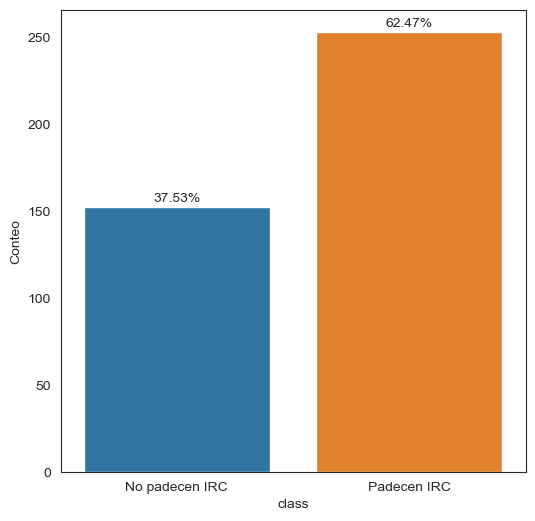

In [16]:
# Creamos el count plot

# Pintamos los porcentajes


### Ajuste de los tipos de variables

Como observamos cuando mostramos la descripción de las variables de tipo objeto, algunas de ellas pueden transformarse en variables de tipo numérico, lo que nos va a facilitar mucho luego trabajar con ellas.

**Muestra los posibles valores que puede tomar cada una de las variables categóricas. ¿Cuáles de ellas transformarías en variables de tipo numérico?**

In [17]:
# Imprimimos los valores únicos que pueden tomar estas variables


Unique values in "sg":
 ['1.020' '1.010' '1.005' '1.015' '?' '1.025'] 

Unique values in "al":
 ['1' '4' '2' '3' '0' '?' '5'] 

Unique values in "su":
 ['0' '3' '4' '1' '?' '2' '5'] 

Unique values in "rbc":
 ['?' 'normal' 'abnormal'] 

Unique values in "pc":
 ['normal' 'abnormal' '?'] 

Unique values in "pcc":
 ['notpresent' 'present' '?'] 

Unique values in "ba":
 ['notpresent' 'present' '?'] 

Unique values in "htn":
 ['yes' 'no' '?'] 

Unique values in "dm":
 ['yes' 'no' '?'] 

Unique values in "cad":
 ['no' 'yes' '?'] 

Unique values in "appet":
 ['good' 'poor' '?'] 

Unique values in "pe":
 ['no' 'yes' '?'] 

Unique values in "ane":
 ['no' 'yes' '?'] 



_Incluye aquí tus observaciones._

**Hemos visto que hay variables en las que los valores ausentes aparecen como signos de interrogación. Crea una lista con los nombres de las variables en las que ocurre esto.**

['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


**Reemplaza esos signos de interrogación por `np.nan` en las variables que sea necesario. Pista: [Pandas dataframe.replace()](https://www.geeksforgeeks.org/python-pandas-dataframe-replace/).**

In [19]:
# Reemplza los signos de interrogación


In [20]:
# Comprobamos en una de ellas que ha funcionado


1.020    107
1.010     85
1.025     82
1.015     77
NaN       47
1.005      7
Name: sg, dtype: int64

**Transforma las variables que creas necesario en variables de tipo numérico.**

In [21]:
# Cambia el tipo de las variables


In [22]:
# Comprueba que se han cambiado correctamente


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      405 non-null    int64  
 1   age     396 non-null    float64
 2   bp      393 non-null    float64
 3   sg      358 non-null    float64
 4   al      359 non-null    float64
 5   su      356 non-null    float64
 6   rbc     251 non-null    object 
 7   pc      340 non-null    object 
 8   pcc     401 non-null    object 
 9   ba      401 non-null    object 
 10  bgr     360 non-null    float64
 11  bu      385 non-null    float64
 12  sc      387 non-null    float64
 13  sod     317 non-null    float64
 14  pot     316 non-null    float64
 15  hemo    353 non-null    float64
 16  pcv     334 non-null    float64
 17  wbcc    299 non-null    float64
 18  rbcc    274 non-null    float64
 19  htn     403 non-null    object 
 20  dm      403 non-null    object 
 21  cad     403 non-null    object 
 22  ap

### Valores duplicados

**Comprueba si hay valores duplicados. ¿Crees que podemos eliminarlos?**

In [23]:
# Muestra los valores duplicados


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
4,11845,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,1
31,42202,73.0,90.0,1.015,3.0,0.0,NaN,abnormal,present,notpresent,...,30.0,7800.0,4.0,no,no,no,poor,no,no,1
184,14491,54.0,60.0,1.015,3.0,2.0,NaN,abnormal,notpresent,notpresent,...,31.0,5800.0,3.6,yes,yes,yes,poor,yes,no,1
312,34340,80.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,48.0,6300.0,6.1,no,no,no,good,no,no,0
390,37281,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,52.0,6300.0,5.3,no,no,no,good,no,no,0
400,42202,73.0,90.0,1.015,3.0,0.0,NaN,abnormal,present,notpresent,...,30.0,7800.0,4.0,no,no,no,poor,no,no,1
401,37281,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,52.0,6300.0,5.3,no,no,no,good,no,no,0
402,34340,80.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,48.0,6300.0,6.1,no,no,no,good,no,no,0
403,14491,54.0,60.0,1.015,3.0,2.0,NaN,abnormal,notpresent,notpresent,...,31.0,5800.0,3.6,yes,yes,yes,poor,yes,no,1
404,11845,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


_Incluye aquí tus observaciones._

**En caso de poder hacerse, elimina los valores duplicados del conjunto de datos.**

In [24]:
# Elimina los valores duplicados

# Resetea el índice

# Muestra las dimensiones del dataset


(400, 26)

### Análisis de la distribución de las variables

Ahora que sabemos ya hemos solucionado los problemas que teníamos con los tipos de las variables y los duplicados, vamos a ver un poco más en profundidad la distribución de nuestras variables.

#### Variables numéricas

**Selecciona las variables numéricas que consideres de interés y crea una lista con sus nombres. ¿Hay alguna que no deberíamos incluir?**

_Incluye aquí tus observaciones._

In [25]:
# Eliminamos la(s) variable(s) que no nos interesa(n)


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [26]:
# Creamos una lista todos los nombres de las variables numéricas


['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'class']

A continuación, te dejo un diccionario que mapea el nombre de la columna a uno más informativo para poder usarlos en las visualizaciones.

In [27]:
num_cols_d = {'age': 'Edad', 'bp': 'Presión arterial',
              'sg': 'Densidad relativa de la orina',
              'al': 'Albúmina en orina', 'su': 'Glucosa en orina',
              'bgr': 'Prueba aleatoria de glucosa',
              'bu': 'Urea en sangre', 'sc': 'Creatinina sérica',
              'sod': 'Sodio en sangre', 'pot': 'Potasio en sangre',
              'hemo': 'Hemoglobina en sangre', 'pcv': 'Hematocrito',
              'wbcc': 'Recuento de células blancas en sangre',
              'rbcc': 'Recuento de células rojas en sangre',
              'class': 'Insuficiencia renal crónica'}

**Crea un histograma para cada una de las variables numéricas que muestre su distribución. Usa la función `subplots()` de la librería Matplotlib para organizar los gráficos en filas y columnas. Pista: [An Introduction to Subplots in Matplotlib](https://medium.com/analytics-vidhya/an-introduction-to-subplots-in-matplotlib-b8b4821b47d1).**

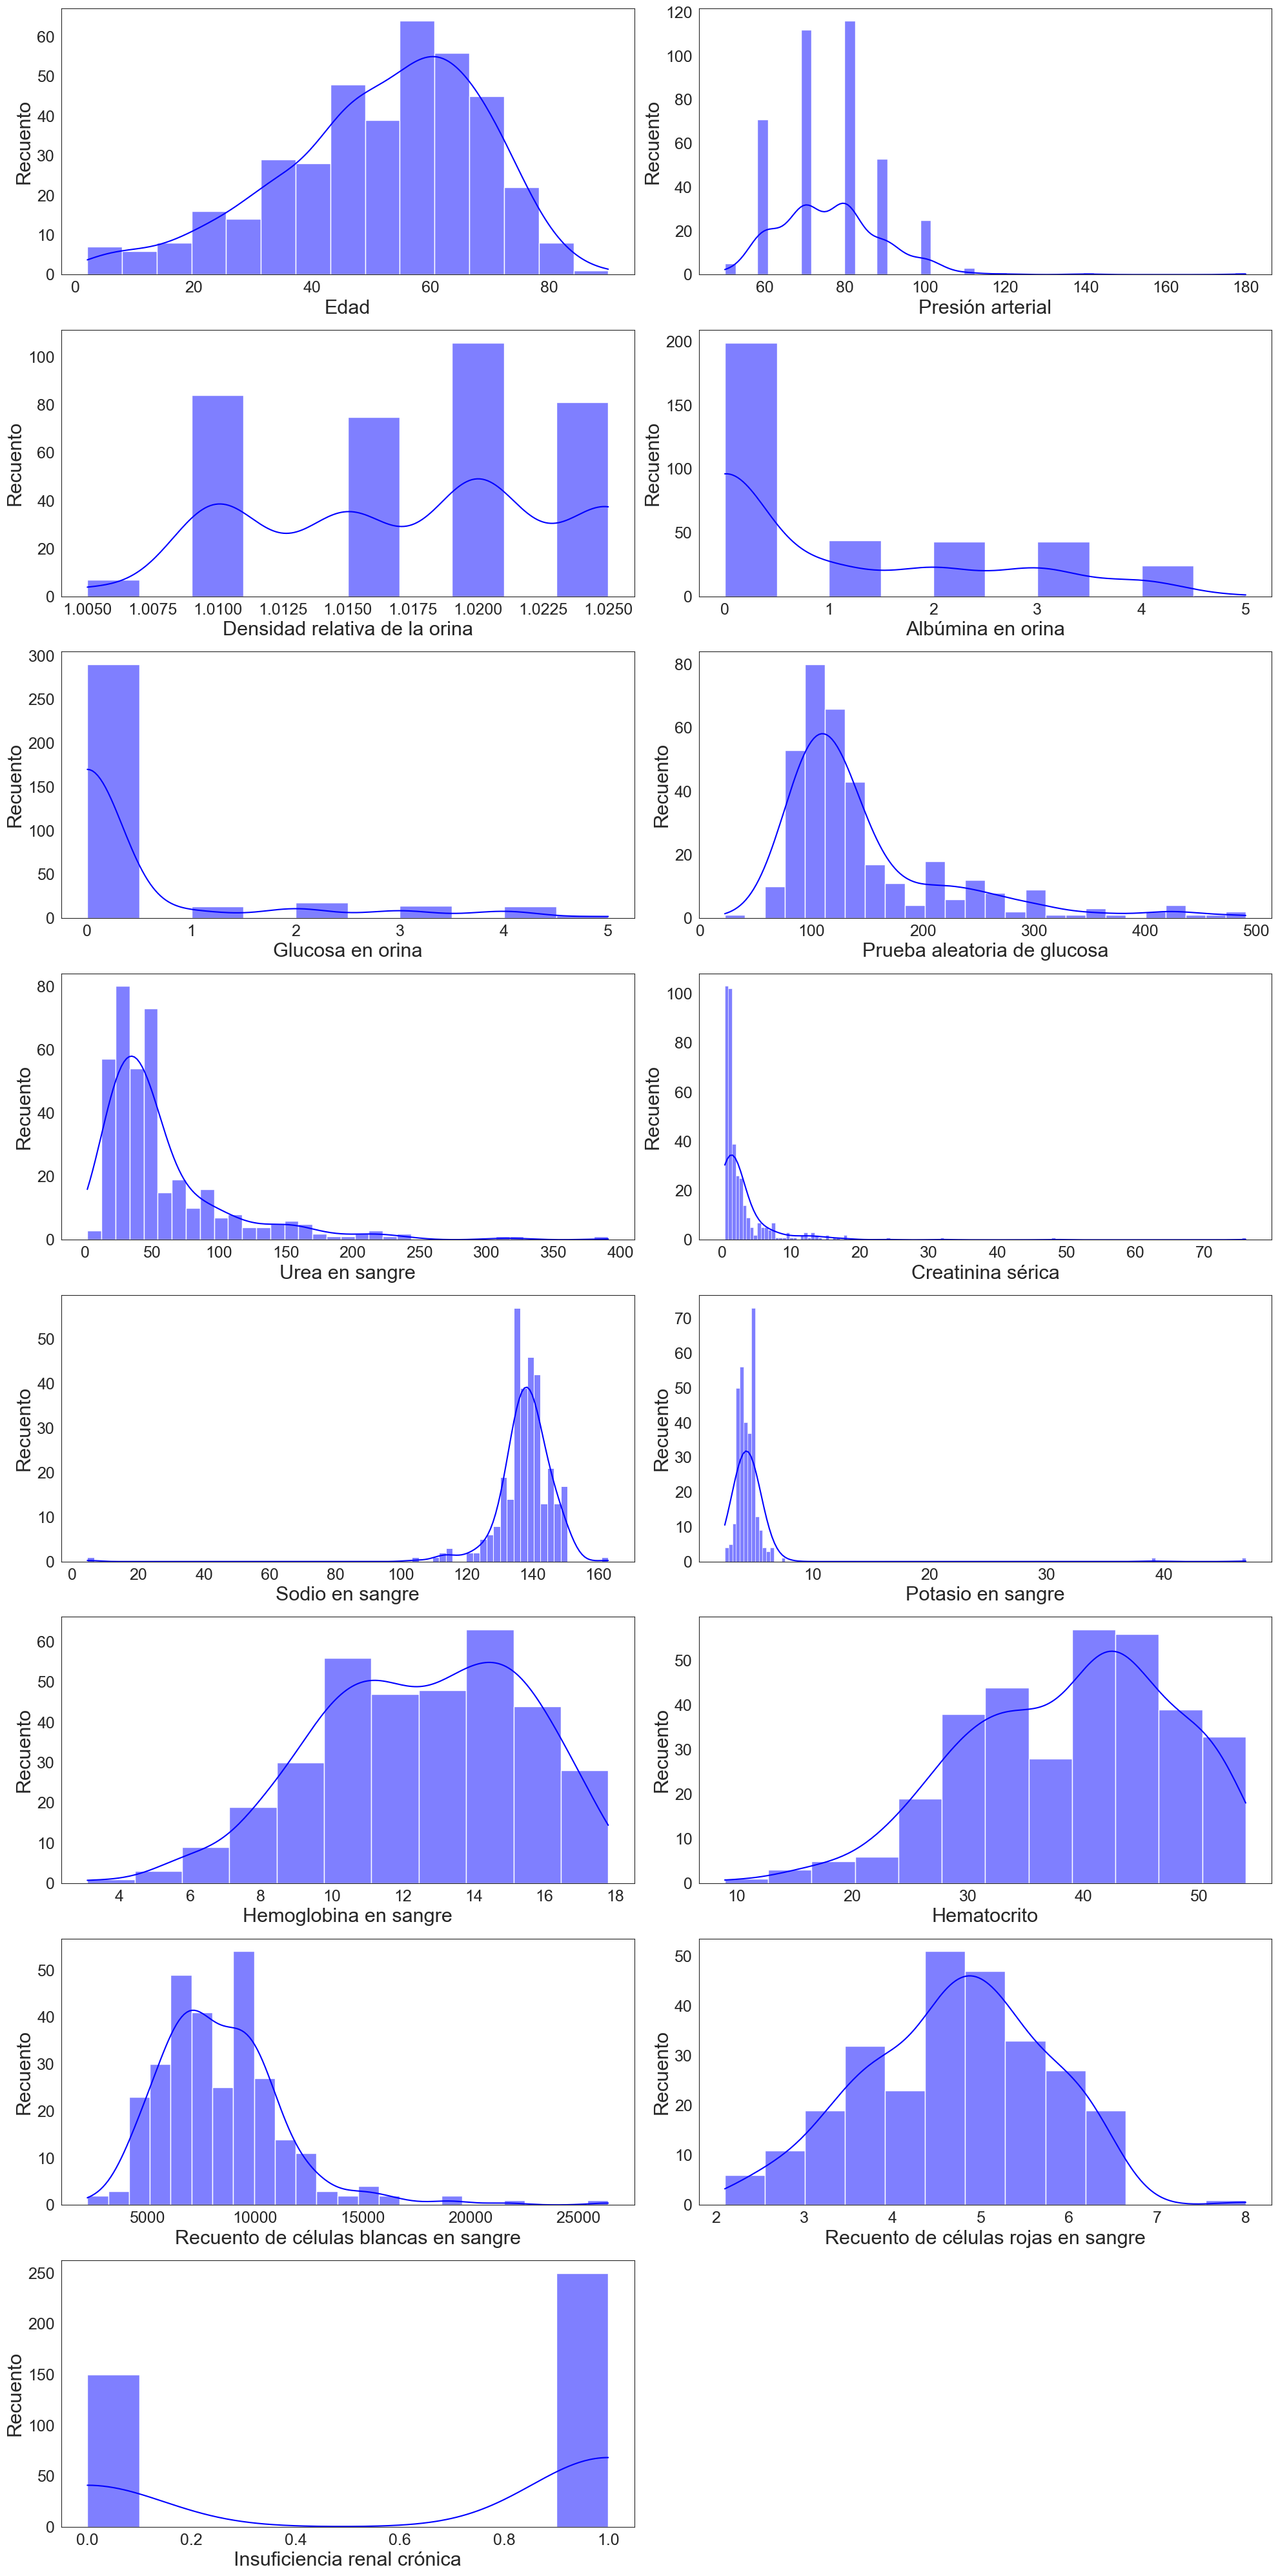

In [28]:
# Generamos los subplots con los histogramas
    
# Eliminamos los ejes del gráfico que nos sobra


_Incluye aquí tus observaciones._

**Usa un _pair plot_ para mostrar la distrubución de las variables numéricas en relación a la variable de salida. Ignora las 3 variables numéricas que en realidad eran categóricas.**

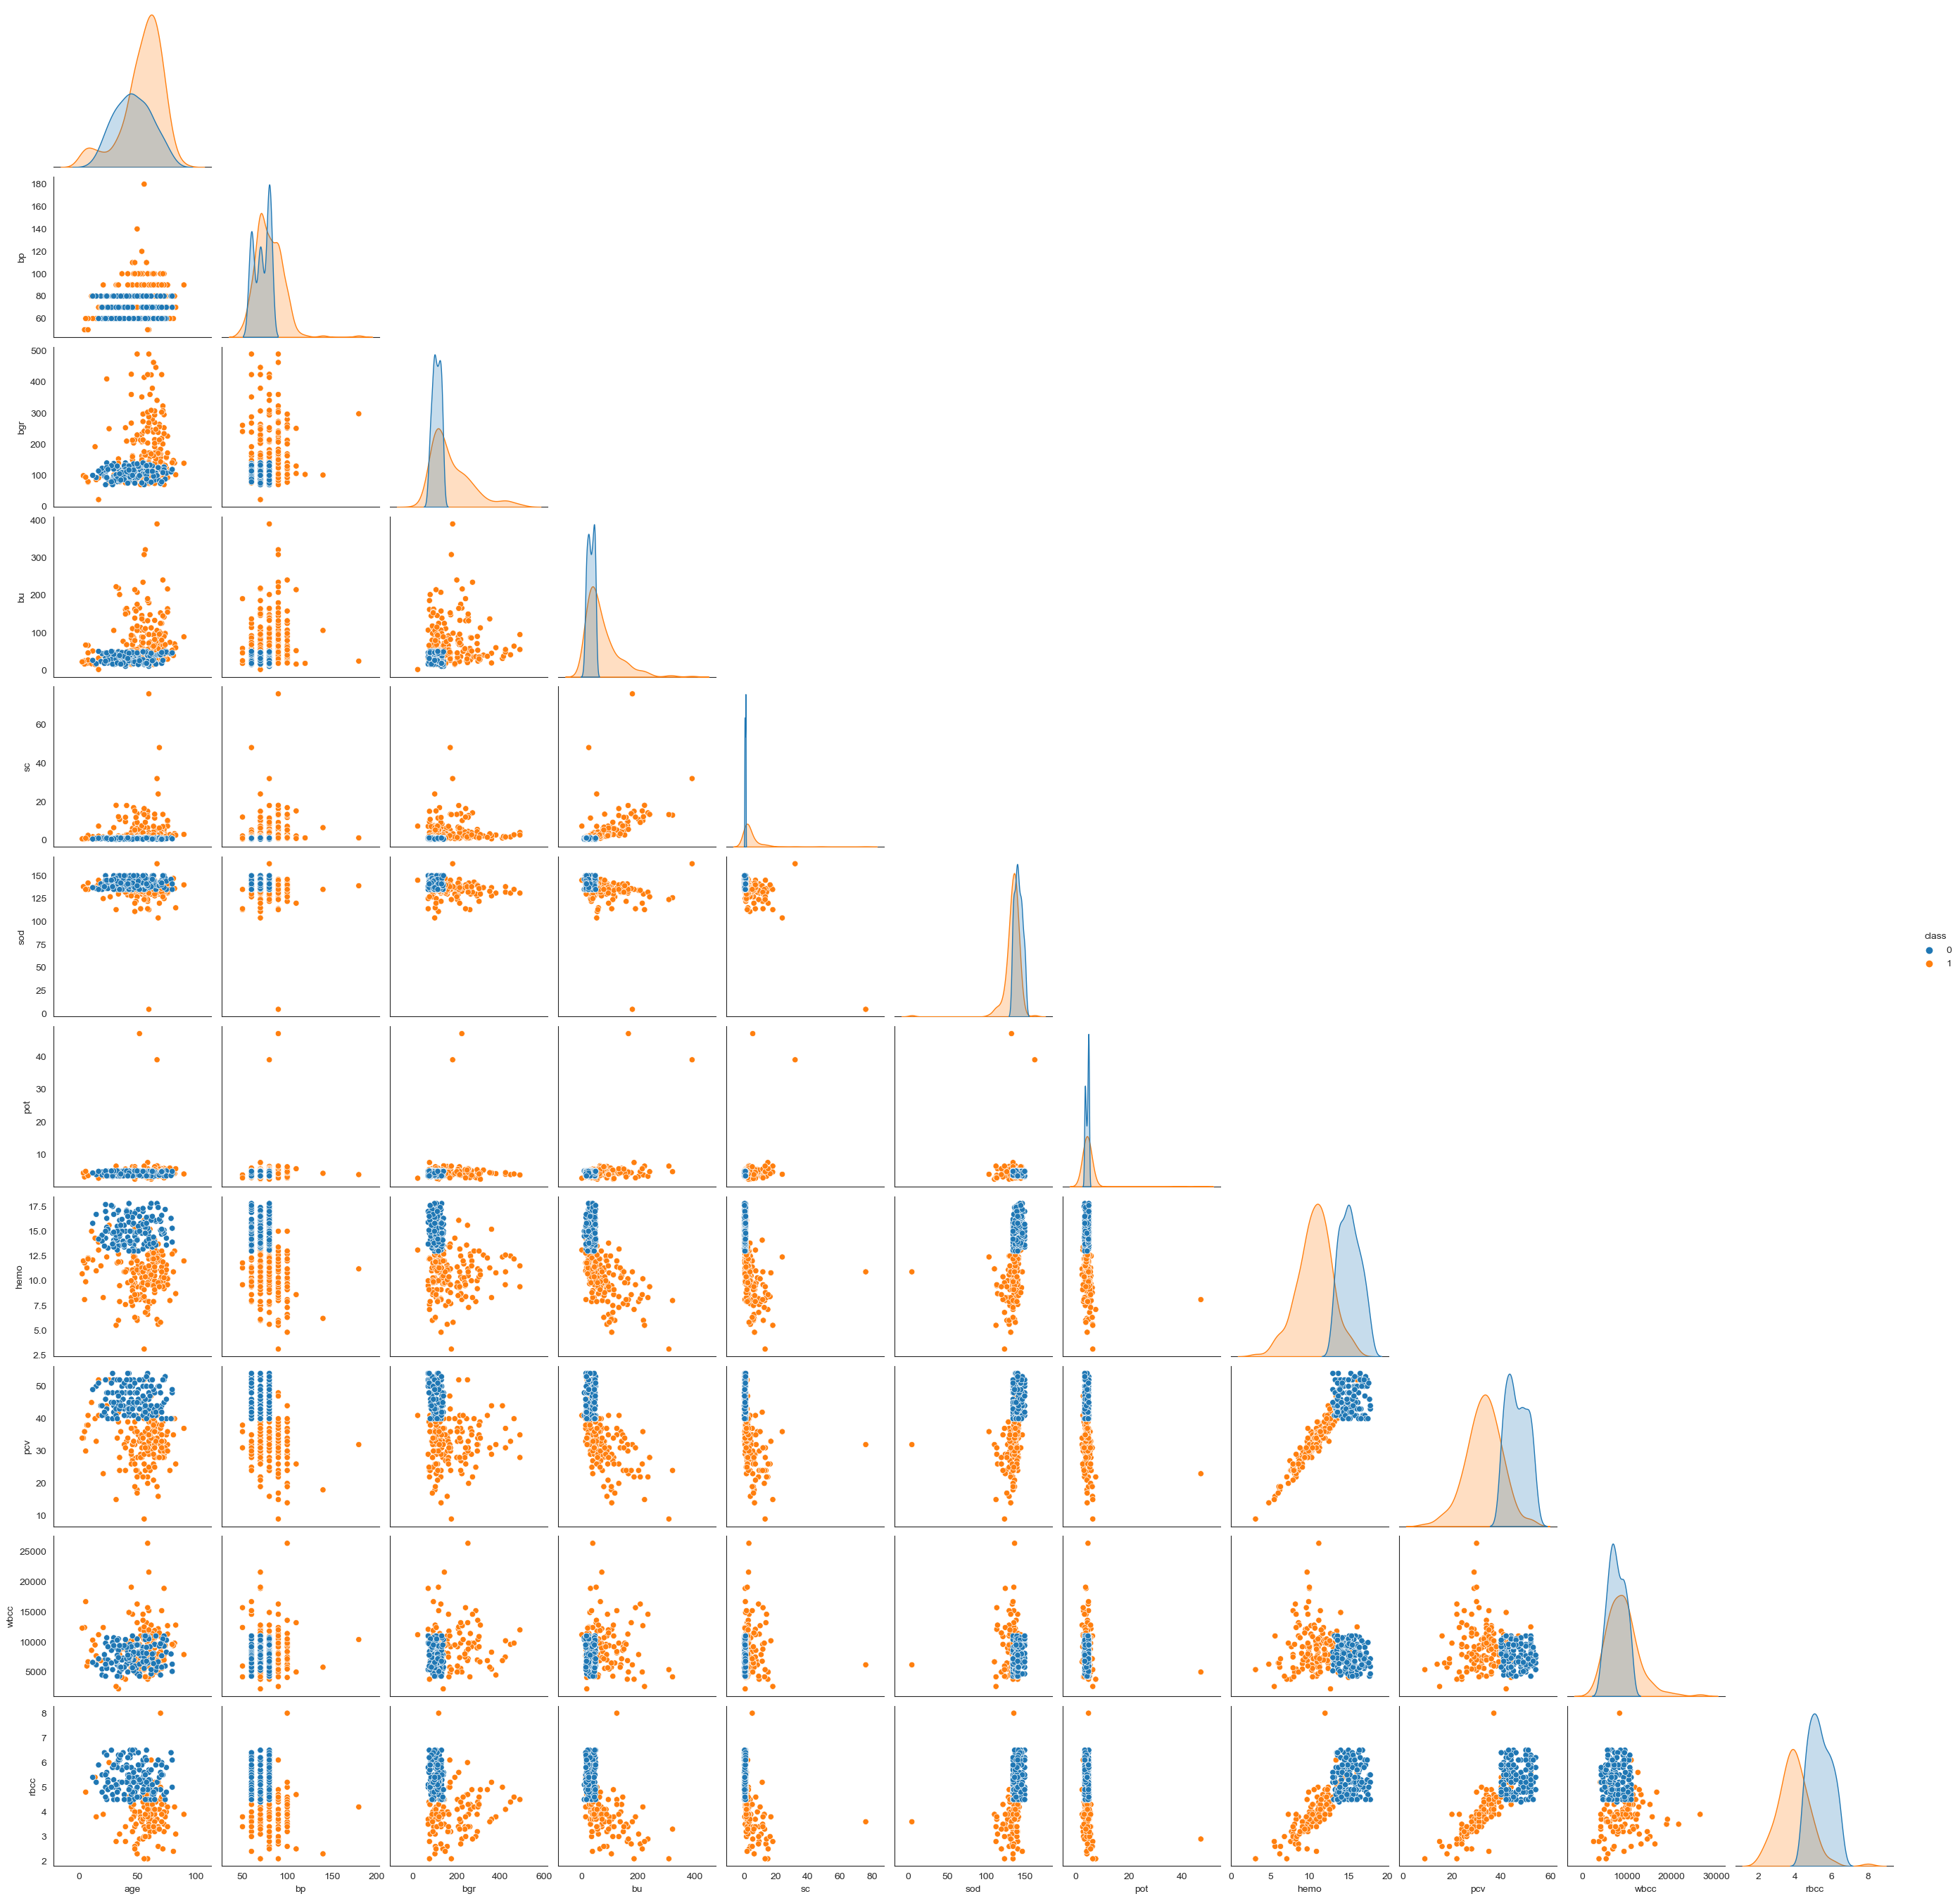

#### Variables categóricas

**Selecciona las variables categóricas que consideres de interés y crea una lista con sus nombres. ¿Hay alguna que no deberíamos incluir?**

In [30]:
# Creamos una lista todos los nombres de las variables categóricas


['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

_Incluye aquí tus observaciones._

A continuación, te dejo un diccionario que mapea el nombre de la columna a uno más informativo para poder usarlos en las visualizaciones.

In [31]:
cat_cols_d = {'rbc': 'Glóbulos rojos en orina',
              'pc': 'Glóbulos blancos en orina',
              'pcc': 'Acúmulos de glóbulos blancos en orina',
              'ba': 'Presencia de bacterias en orina',
              'htn': 'Hipertensión', 'dm': 'Diabetes mellitus',
              'cad': 'Enfermedad coronaria', 'appet': 'Apetito',
              'pe': 'Edema en pies', 'ane': 'Anemia'}

**Crea un _count plot_ para cada una de las variables categóricas que muestre su distribución, en función de la variable de salida. Usa la función `subplots()` de la librería Matplotlib para organizar los gráficos en filas y columnas como hiciste con las variables numéricas.**

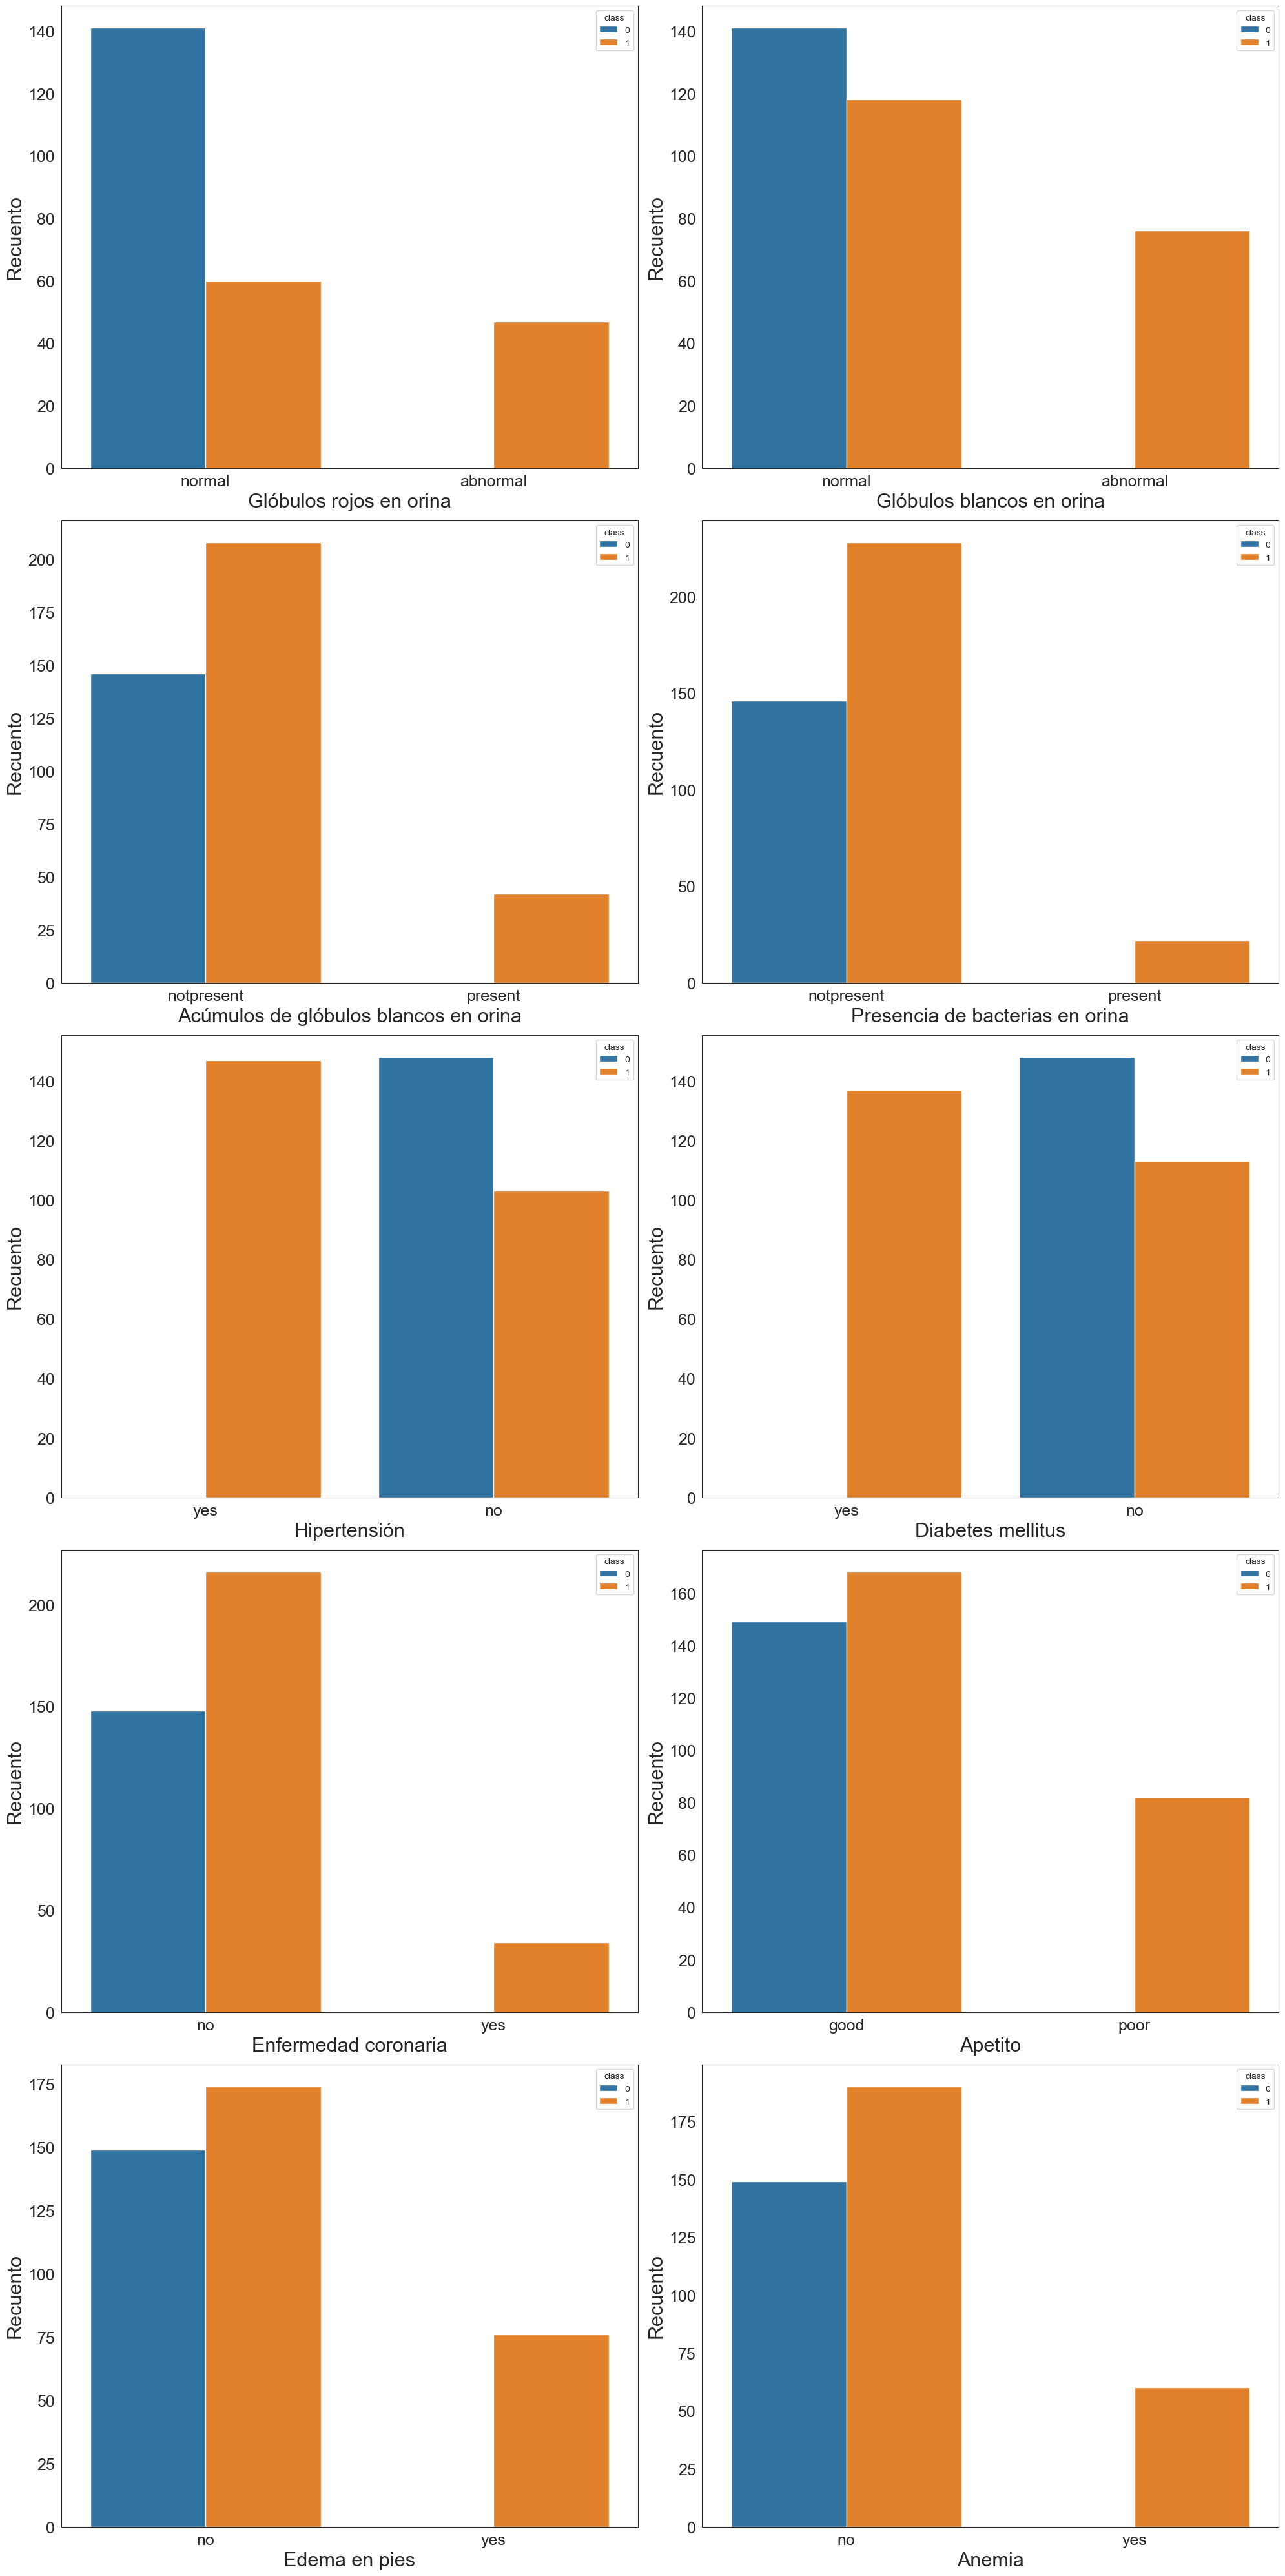

In [32]:
# Generamos los subplots con los count plots


_Incluye aquí tus observaciones._

### Valores ausentes

**Comprueba qué variables tienen valores ausentes y en qué porcentaje. Muestra solo las variables que tienen valores ausentes.**

In [33]:
# Calculamos el número de valores ausentes

# Calculamos los porcentajes y los ordenamos


rbc      38.00
rbcc     32.75
wbcc     26.50
pot      22.00
sod      21.75
pcv      17.75
pc       16.25
hemo     13.00
su       12.25
sg       11.75
al       11.50
bgr      11.00
bu        4.75
sc        4.25
bp        3.00
age       2.25
ba        1.00
pcc       1.00
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
dtype: float64

**Usa un mapa de calor para mostrar las variables que tienen valores ausentes.**

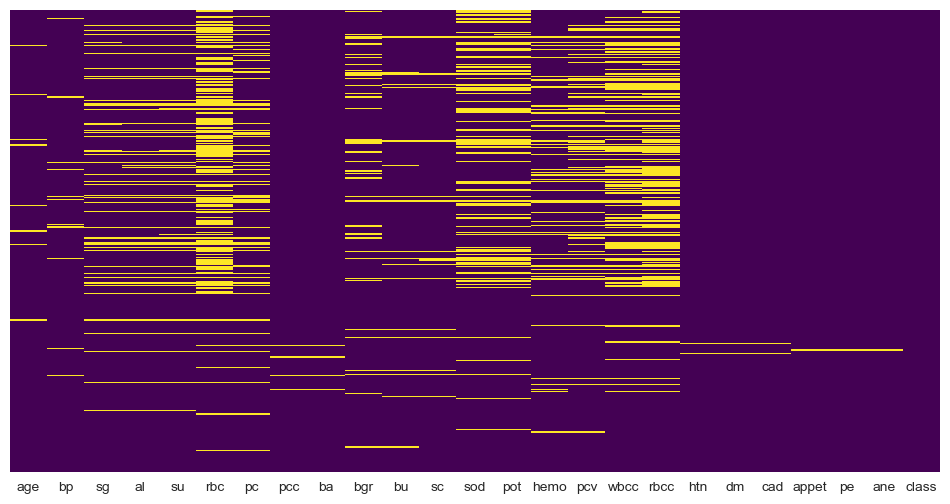

**Muestra el recuento de valores ausentes usando un diagrama de barras en el que las variables aparezcan ordenadas de más a menos valores ausentes. Intenta mostrar también la cifra de valores ausentes sobre cada barra.**

In [35]:
# Hacemos primero los recuentos


rbc      152
rbcc     131
wbcc     106
pot       88
sod       87
pcv       71
pc        65
hemo      52
su        49
sg        47
al        46
bgr       44
bu        19
sc        17
bp        12
age        9
ba         4
pcc        4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

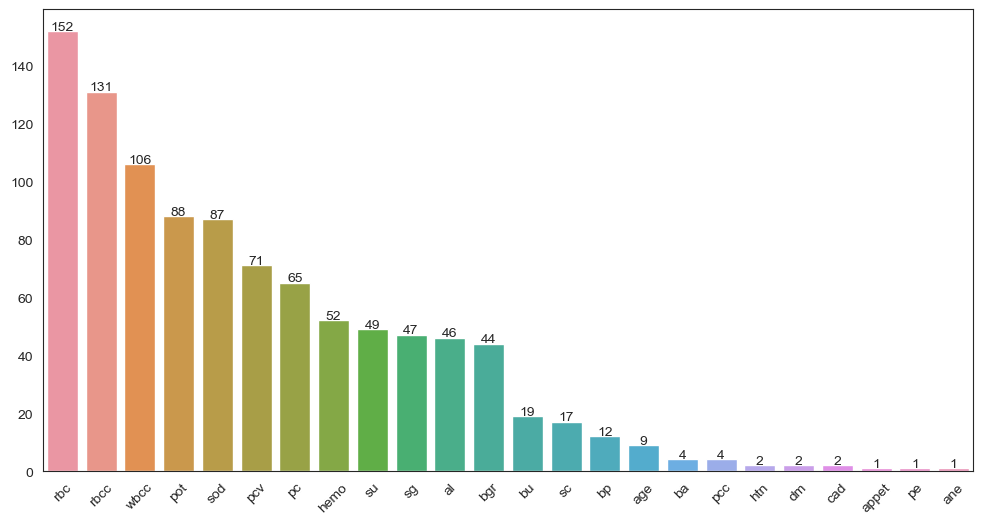

In [36]:
# Mostramos los recuentos en un diagrama de barras

# Ponemos las cifras de los recuentos sobre las barras


**Analiza las variables que tienen valores nulos. ¿Es lógico que estos aparezcan? ¿A qué tipo de valores ausentes crees que pertenecen?**

_Incluye aquí tus observaciones._

**Imputa los valores ausentes usando el método `KNNImputer` de la librería Scikit-Learn.**

Dado que algunas características tienen altas proporciones de valores ausentes, no es recomendable imputar con medidas de tendencia central como la media o la median ya que seguramente esto distorsionaría sus distribuciones.

El algoritmo `KNNImputer` lo que hace es que imputa valores ausentes de cada muestra utilizando el valor medio de los `k` vecinos más cercanos que se encuentran en el conjunto de entrenamiento, es decir, el valor medio de las muestras que más se parecen al registro en el que necesitamos imputar el valor nulo, lo que tiene un impacto menor sobre la distribución de los datos.

Una cosa a tener en cuenta aquí es que `KNNImputer` no reconoce valores de datos categóricos en forma de texto y nos dará error si no cambiamos estos valores a valores numéricos. Esto va a pasar con muchos otros algoritmos.

Una buena manera de modificar los datos de texto es realizar una codificación one-hot o crear "variables ficticias". La idea es convertir cada categoría en una columna de datos binarios asignándoles un 1 o un 0.

Más información sobre One-Hot-Enconding: [Using Categorical Data with One Hot Encoding](https://www.kaggle.com/code/dansbecker/using-categorical-data-with-one-hot-encoding/notebook).

**Transforma las variables de tipo objeto en variables de tipo numérico usando la técnica del One-Hot-Encoding y crea una nueva variable llamada `data_ohe` que contenga todo el conjunto de datos y en la que las variables categóricas estén en formato _one-hot-encoding_.**

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,0,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,1,1,0,0,0,0,0,0,0,0


In [38]:
# Muestra la información del nuevo dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          391 non-null    float64
 1   bp           388 non-null    float64
 2   sg           353 non-null    float64
 3   al           354 non-null    float64
 4   su           351 non-null    float64
 5   bgr          356 non-null    float64
 6   bu           381 non-null    float64
 7   sc           383 non-null    float64
 8   sod          313 non-null    float64
 9   pot          312 non-null    float64
 10  hemo         348 non-null    float64
 11  pcv          329 non-null    float64
 12  wbcc         294 non-null    float64
 13  rbcc         269 non-null    float64
 14  class        400 non-null    int64  
 15  rbc_normal   400 non-null    uint8  
 16  pc_normal    400 non-null    uint8  
 17  pcc_present  400 non-null    uint8  
 18  ba_present   400 non-null    uint8  
 19  htn_yes 

Otra cosa que debemos tener en cuenta es que el algoritmo `KNNImptuer` es un método de imputación basado en distancias y requiere que normalicemos nuestros datos. De lo contrario, las diferentes escalas de nuestros datos llevarán a `KNNImputer` a generar reemplazos sesgados para los valores ausentes, ya que dará más importancia a aquellas características con valores más grandes. Usaremos la clase `MinMaxScaler()` de Scikit-Learn que ya conocemos y que escalará nuestras variables para que tengan valores entre 0 y 1.

Antes de realizar este paso va a ser necesario dividir los datos en los conjuntos de entrenamiento y prueba ya que si no estaríamos provocando lo que se conoce como fuga de datos.

**Separa las variables de entrada de la variable de salida y asígnalas a dos variables llamadas `X` e `y` respectivamente.**

**Divide el dataset en los conjuntos de entrenamiento y prueba usando la función `train_test_split()` de la librería Scikit-Learn en una proporción de 70/30. Usa un `random_state=0` y estratifica en base a `y`.**

**Escala los datos usando la clase `MinMaxScaler()` de la librería Scikit-Learn.**

In [41]:
# Instancia el escalador

# Escala el dataset de entrenamiento y recréalo con las columnas estandarizadas


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0.261364,0.076923,0.75,0.00,0.0,0.124682,0.044619,0.000000,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.602273,0.230769,0.25,0.00,0.0,0.193384,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.375000,0.230769,0.00,0.75,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.545455,0.307692,NaN,NaN,NaN,0.048346,0.283465,0.074172,0.772871,0.042697,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.488636,0.076923,0.75,0.00,0.0,0.111959,0.041995,0.002649,0.861199,0.038202,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.465909,0.230769,1.00,0.00,0.0,0.152672,0.052493,0.007947,0.873817,0.056180,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.500000,0.461538,0.50,0.00,0.0,0.152672,0.015748,0.005298,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,NaN,0.153846,0.75,0.00,0.0,0.379135,0.068241,0.010596,0.848580,0.026966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,0.102273,0.230769,0.25,0.75,0.0,NaN,0.018373,0.003974,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Escala el dataset de prueba y recréalo con las columnas estandarizadas


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0.545455,NaN,NaN,NaN,NaN,0.379135,0.435696,0.176159,0.829653,0.044944,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.556818,0.076923,0.75,0.00,0.0,0.150127,0.039370,0.009272,0.848580,0.056180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.693182,0.153846,1.00,0.00,0.0,0.152672,0.070866,0.005298,0.917981,0.056180,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.534091,0.384615,0.25,0.75,0.0,0.150127,0.388451,0.149669,0.741325,0.015730,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.522727,0.461538,0.50,0.75,0.0,0.091603,0.538058,0.194702,0.728707,0.071910,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.750000,0.230769,0.25,0.75,0.4,0.221374,0.209974,0.047682,0.791798,0.087640,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
76,0.738636,0.230769,1.00,0.00,0.0,0.073791,0.078740,0.000000,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.352273,0.230769,1.00,0.00,0.0,0.147583,0.073491,0.001325,0.823344,0.031461,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.306818,0.230769,0.75,0.00,0.0,0.000000,0.015748,0.002649,0.842271,0.022472,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora que nuestro conjunto de datos tiene variables ficticias y está normalizado, podemos pasar a la imputación usando la clase `KNNImputer()`. Configuraremos el parámetro `n_neighbors` como 3. Así, los valores que faltan serán reemplazados por el valor medio de los 3 vecinos más cercanos medidos por la distancia euclidiana.

In [43]:
from sklearn.impute import KNNImputer

In [44]:
# Instancia el imputador

# Imputa los valores ausentes en el conjunto de entrenamiento


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0.261364,0.076923,0.750000,0.000000,0.000000,0.124682,0.044619,0.000000,0.856993,0.045693,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.602273,0.230769,0.250000,0.000000,0.000000,0.193384,0.027122,0.011479,0.856993,0.032959,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.375000,0.230769,0.000000,0.750000,0.000000,0.093299,0.027122,0.003974,0.838065,0.031461,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.545455,0.307692,0.583333,0.416667,0.066667,0.048346,0.283465,0.074172,0.772871,0.042697,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.488636,0.076923,0.750000,0.000000,0.000000,0.111959,0.041995,0.002649,0.861199,0.038202,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.465909,0.230769,1.000000,0.000000,0.000000,0.152672,0.052493,0.007947,0.873817,0.056180,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.500000,0.461538,0.500000,0.000000,0.000000,0.152672,0.015748,0.005298,0.856993,0.032959,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,0.382576,0.153846,0.750000,0.000000,0.000000,0.379135,0.068241,0.010596,0.848580,0.026966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,0.102273,0.230769,0.250000,0.750000,0.000000,0.167939,0.018373,0.003974,0.838065,0.035955,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Imputa los valores ausentes en el conjunto de prueba


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0.545455,0.256410,0.583333,0.75,0.0,0.379135,0.435696,0.176159,0.829653,0.044944,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.556818,0.076923,0.750000,0.00,0.0,0.150127,0.039370,0.009272,0.848580,0.056180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.693182,0.153846,1.000000,0.00,0.0,0.152672,0.070866,0.005298,0.917981,0.056180,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.534091,0.384615,0.250000,0.75,0.0,0.150127,0.388451,0.149669,0.741325,0.015730,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.522727,0.461538,0.500000,0.75,0.0,0.091603,0.538058,0.194702,0.728707,0.071910,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.750000,0.230769,0.250000,0.75,0.4,0.221374,0.209974,0.047682,0.791798,0.087640,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
76,0.738636,0.230769,1.000000,0.00,0.0,0.073791,0.078740,0.000000,0.848580,0.034457,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.352273,0.230769,1.000000,0.00,0.0,0.147583,0.073491,0.001325,0.823344,0.031461,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.306818,0.230769,0.750000,0.00,0.0,0.000000,0.015748,0.002649,0.842271,0.022472,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Comprueba si hay valores nulos en los conjuntos de entrenamiento y prueba.**

In [46]:
# En el conjunto de entrenamiento


False

In [47]:
# En el conjunto de prueba


False

### Detección de valores atípicos

**Analiza la distribución de las características numéricas del conjunto de datos en función de si el paciente padece o no IRC usando visualizaciones de tipo _box plots_ e histogramas.**

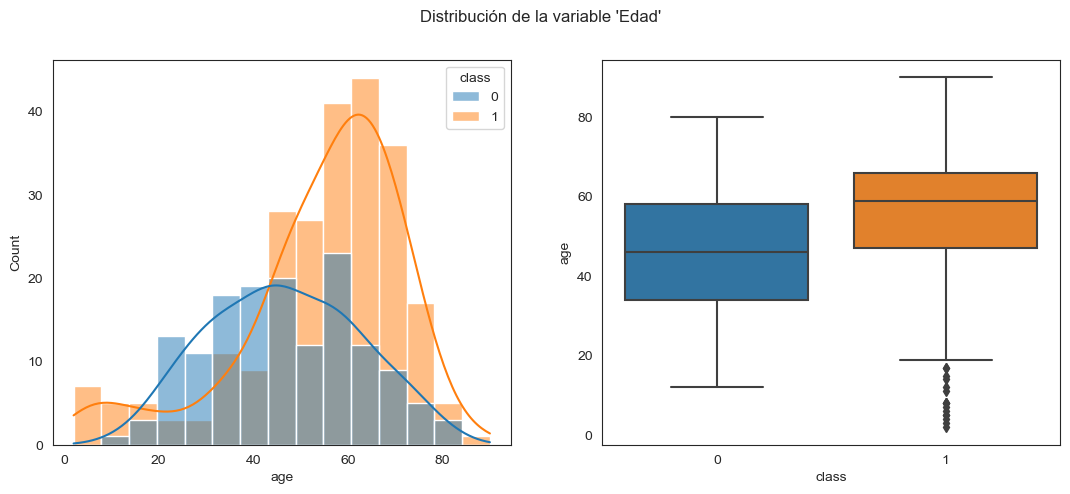

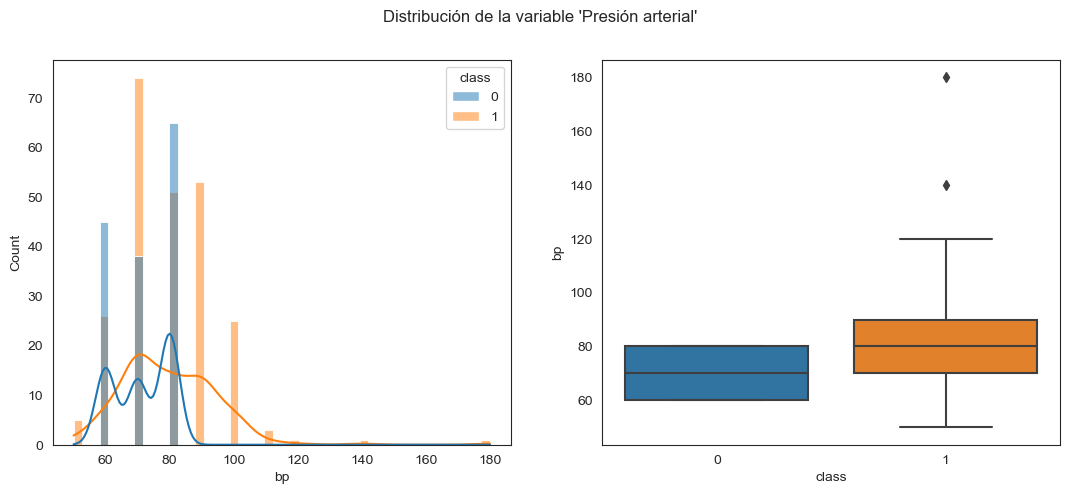

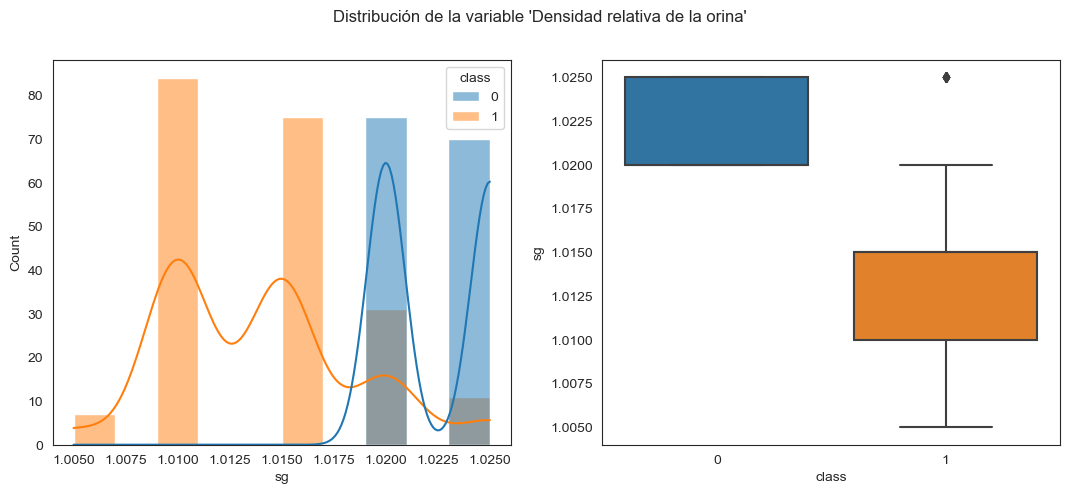

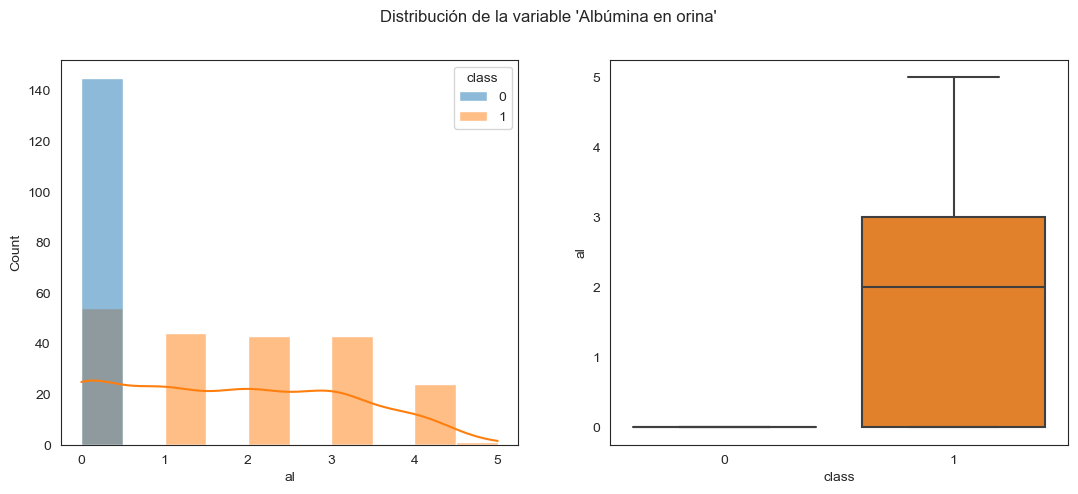

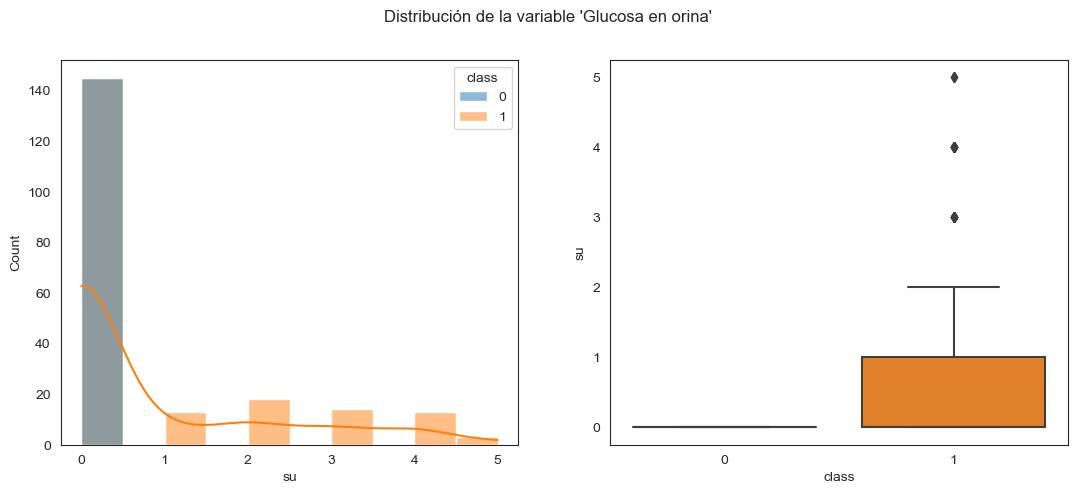

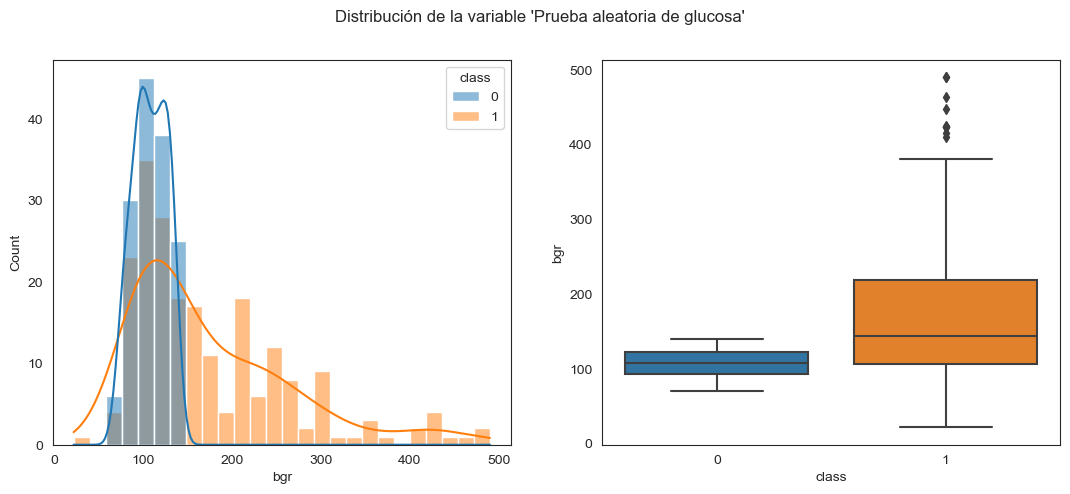

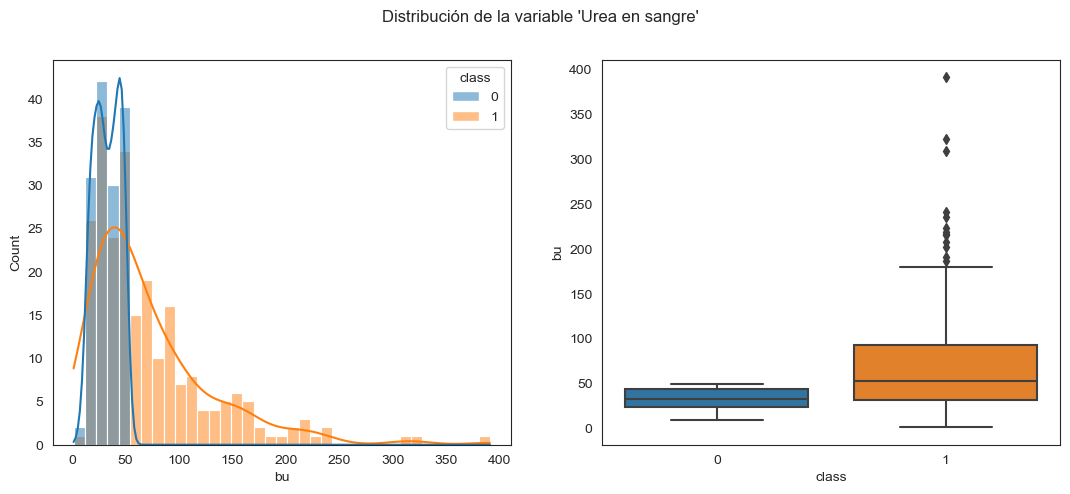

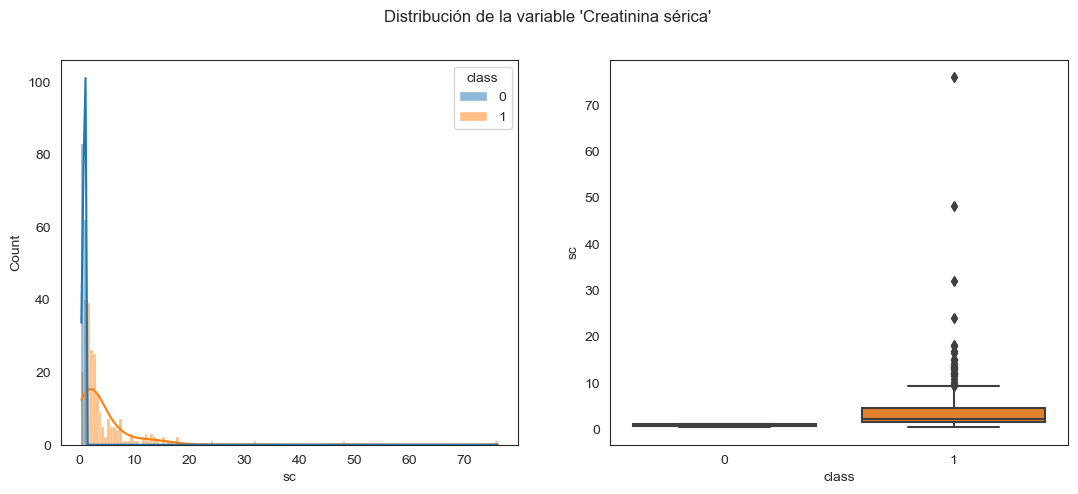

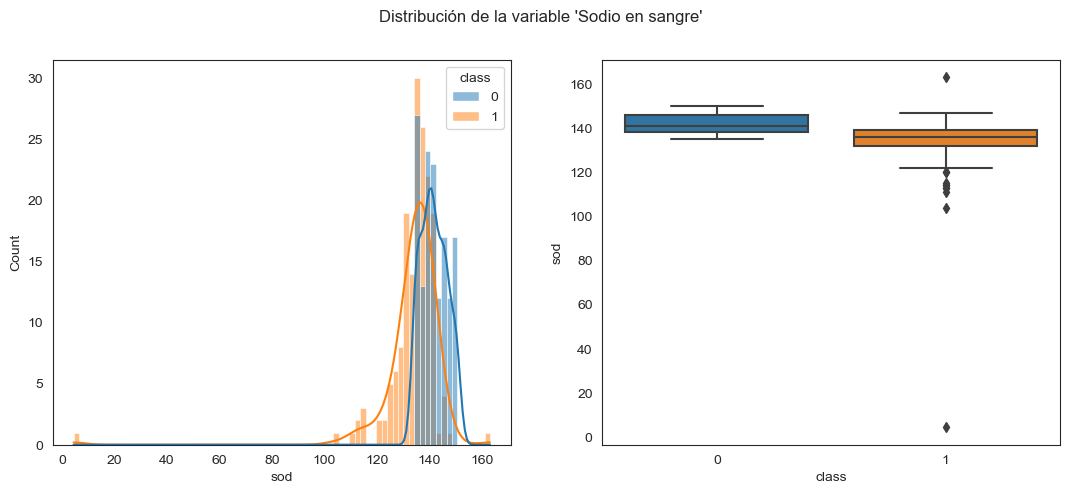

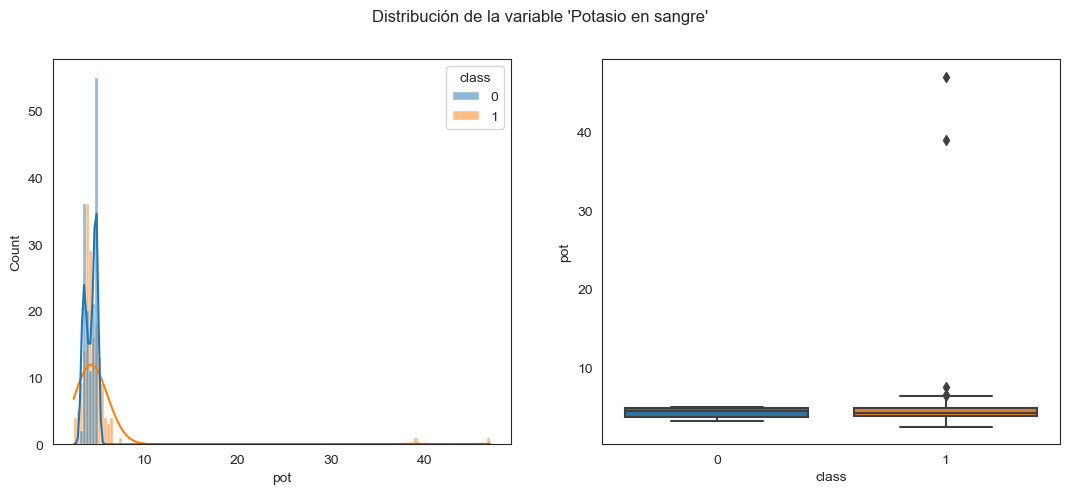

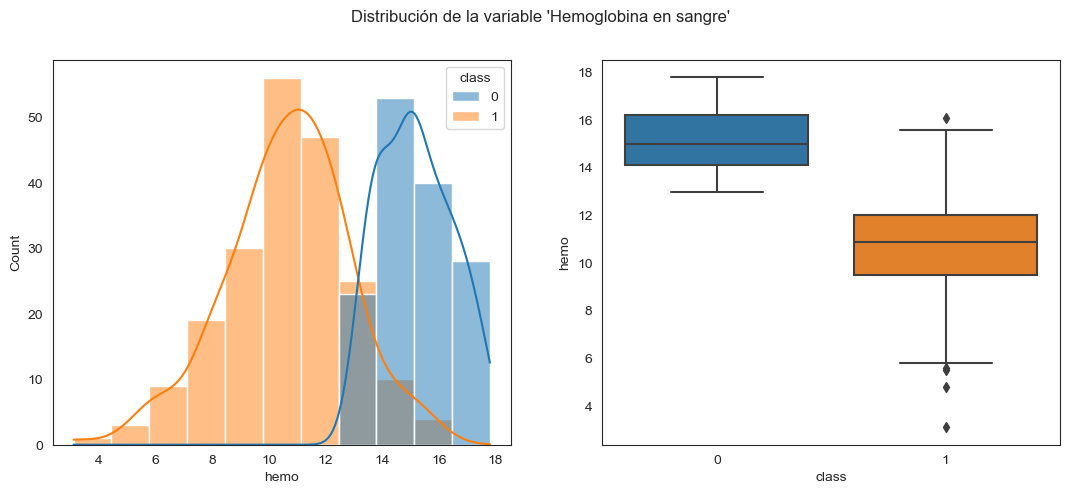

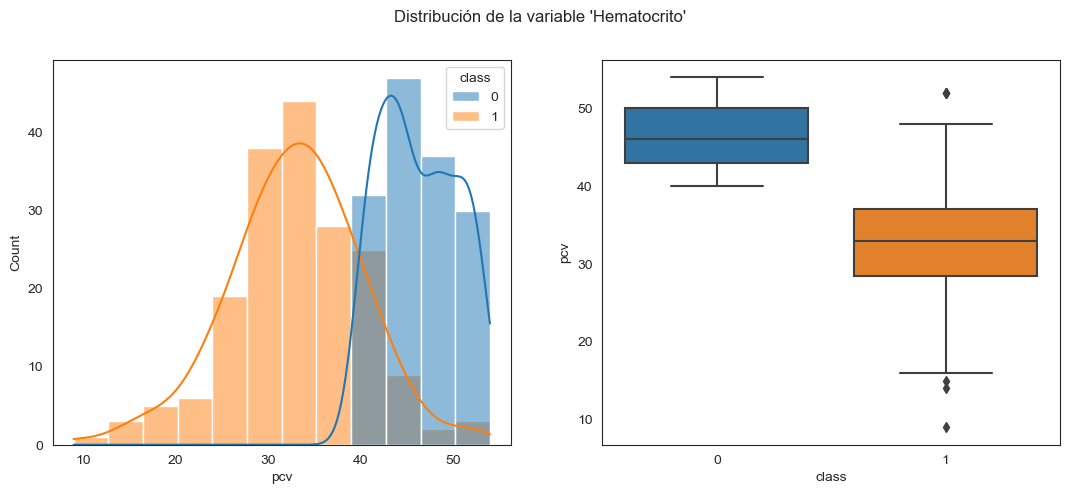

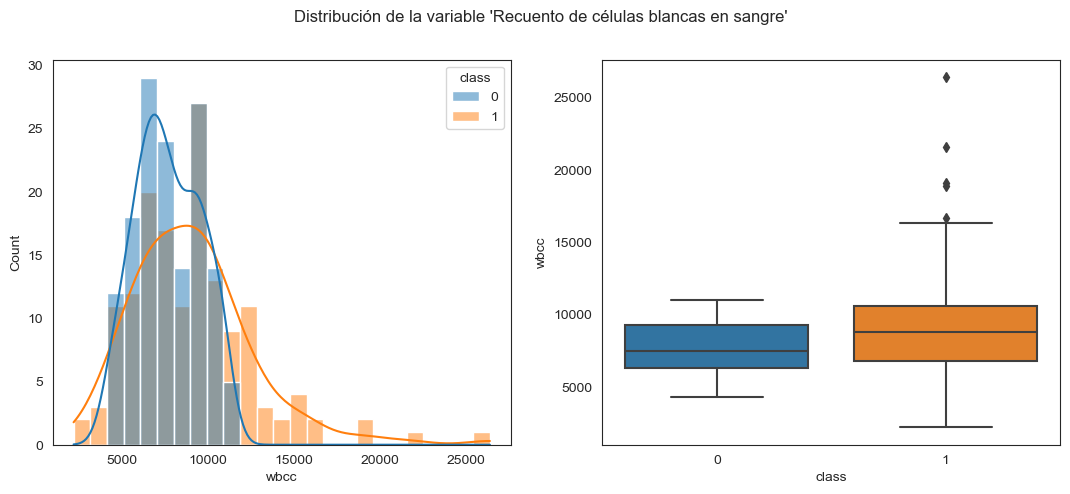

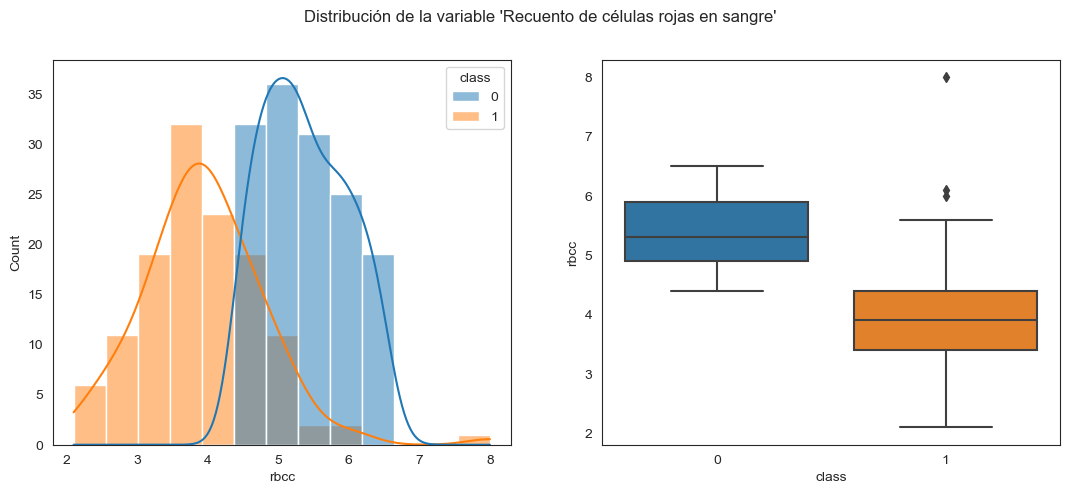

_Incluye aquí tus observaciones._

**¿Crees que es conveniente eliminar los valores atípicos?**

_Incluye aquí tus observaciones._

### Estudio de la correlación

**Crea el mapa de calor con los índices de correlación que incluya también las variables categóricas en formato one-hot-encoding. Como son muchas variables, exporta el gráfico en formato PNG para poder visualizarlo mejor.**

In [49]:
# Ponemos la columna de la clase al final del DataFrame para facilitar la visualización


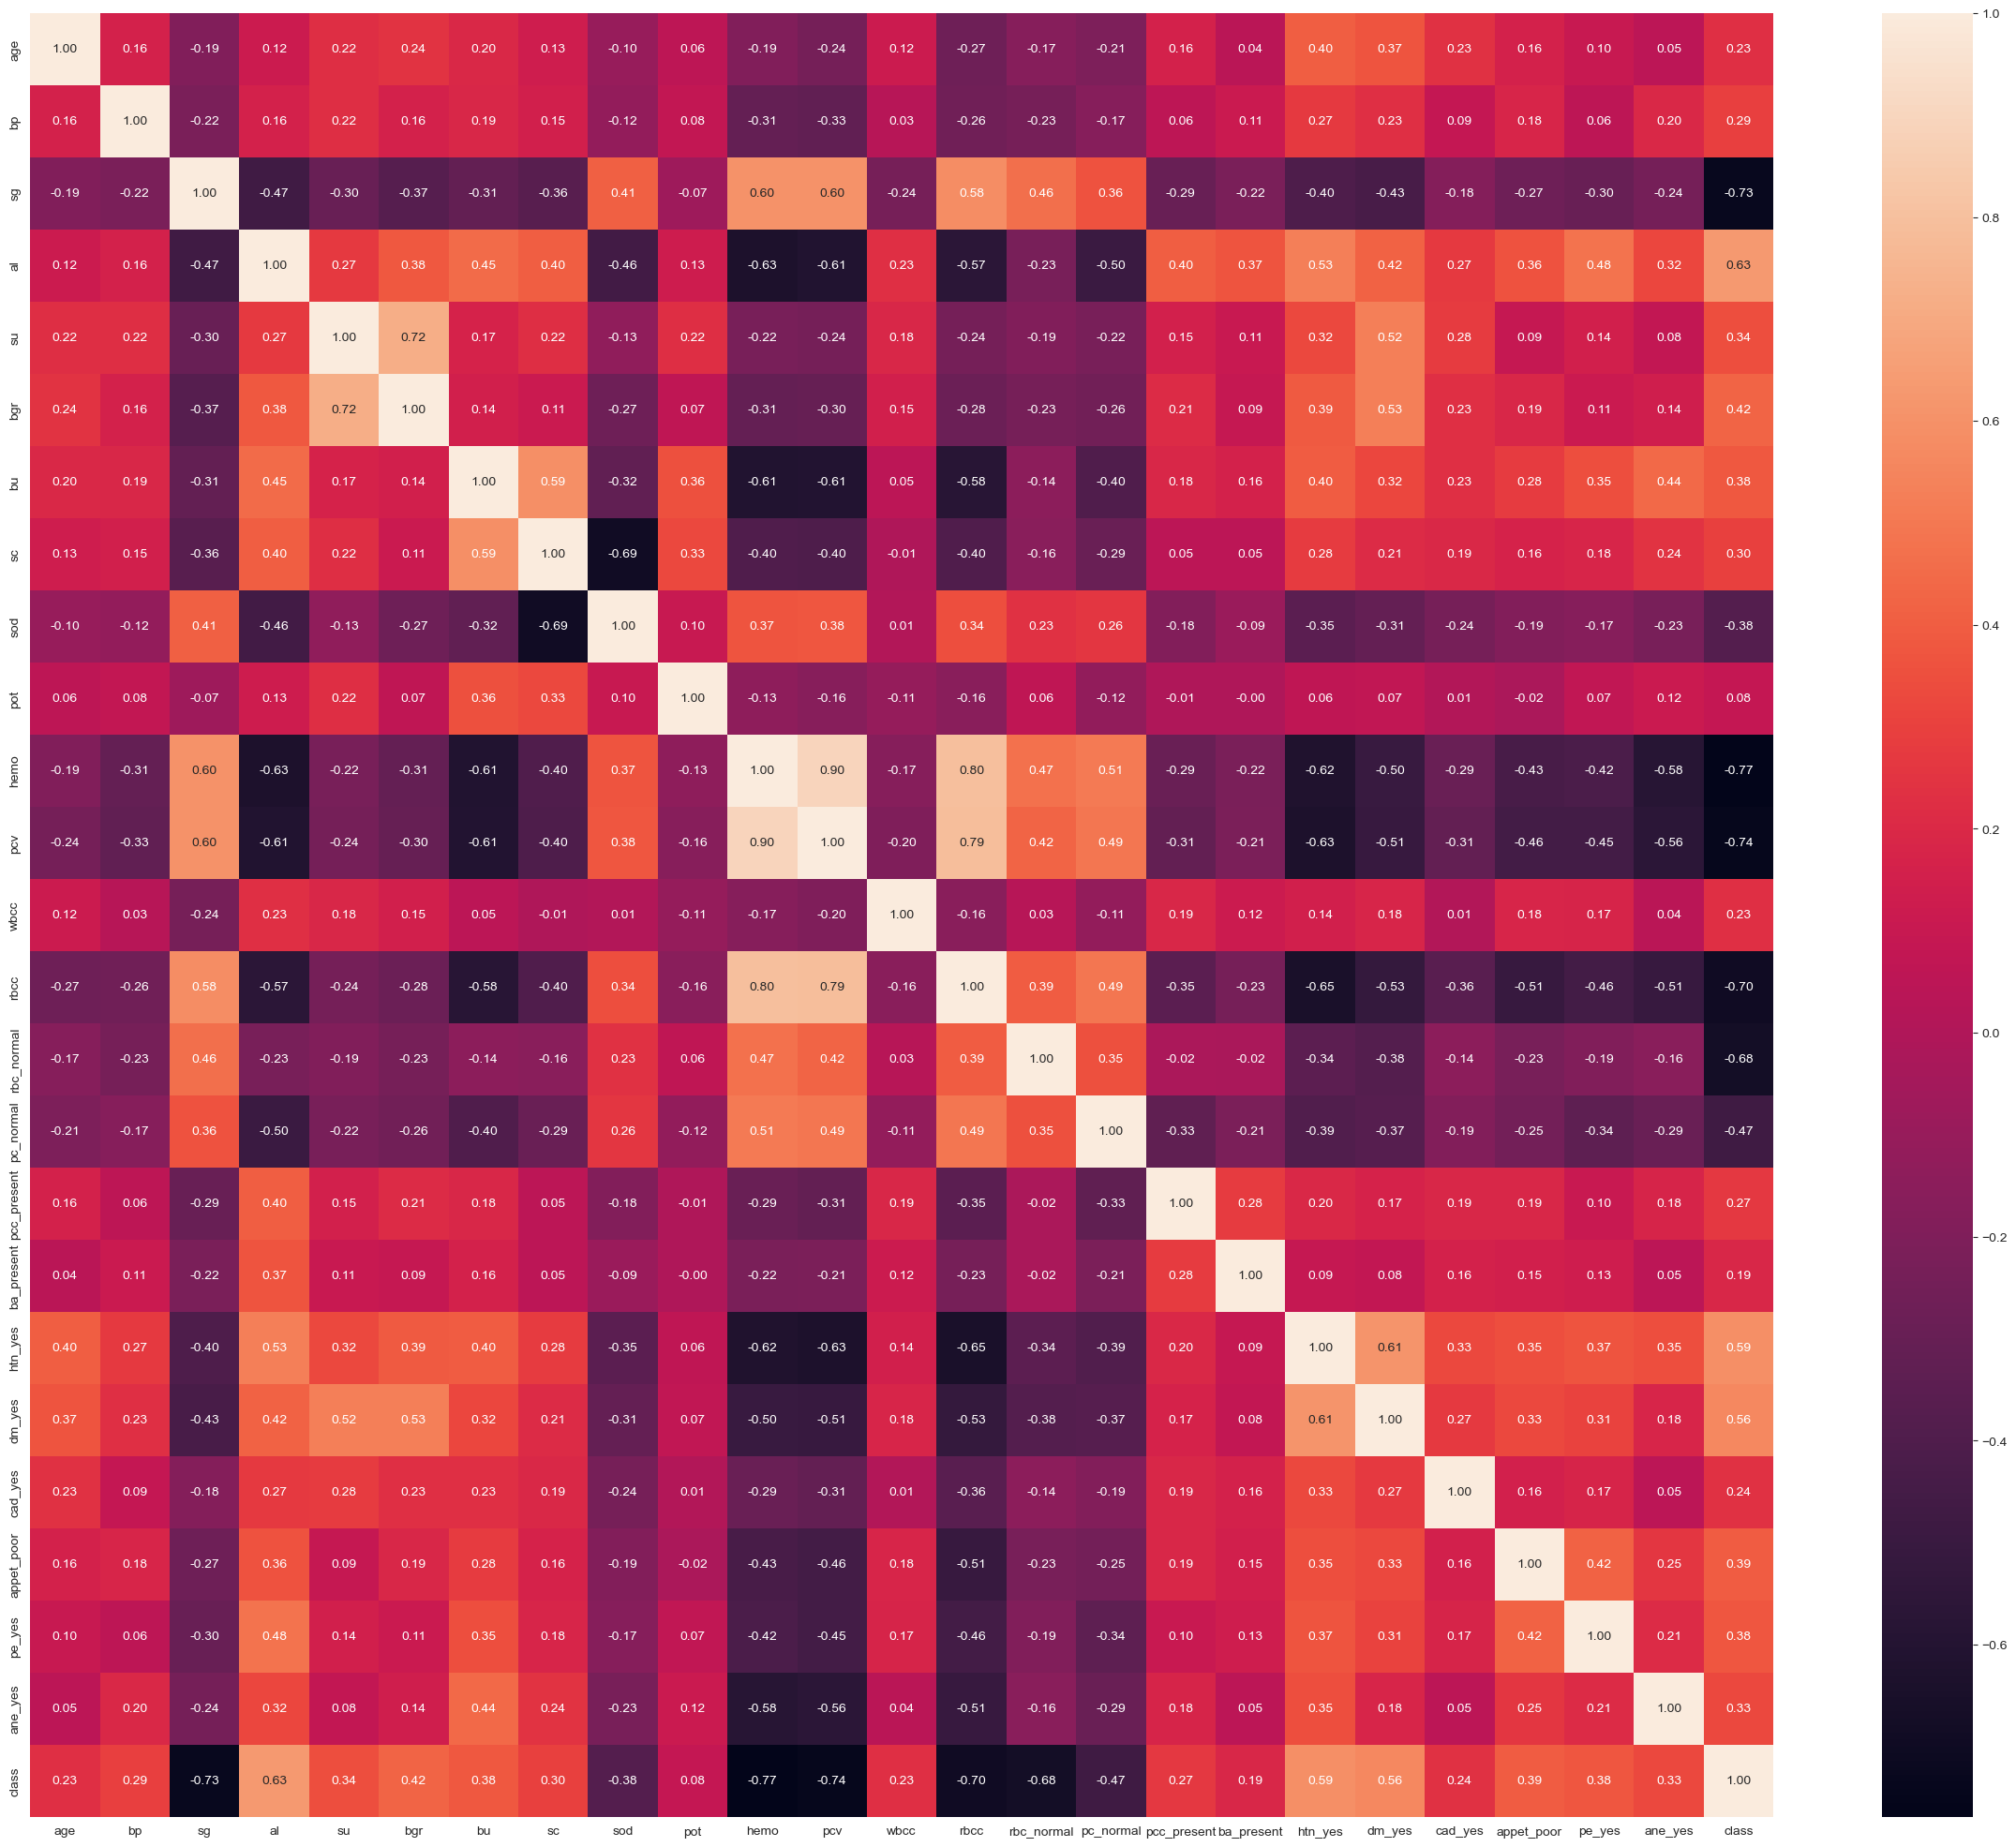

In [50]:
# Creamos el heatmap con las correlaciones

# Guardamos la imagen


In [51]:
# Mostramos los valores de correlación con la variable de salida


age            0.227268
bp             0.294077
sg            -0.732163
al             0.627090
su             0.344070
bgr            0.419672
bu             0.380605
sc             0.299969
sod           -0.375674
pot            0.084541
hemo          -0.768919
pcv           -0.741427
wbcc           0.231919
rbcc          -0.699089
rbc_normal    -0.677781
pc_normal     -0.474244
pcc_present    0.265313
ba_present     0.186871
htn_yes        0.590438
dm_yes         0.559060
cad_yes        0.236088
appet_poor     0.393341
pe_yes         0.375154
ane_yes        0.325396
class          1.000000
Name: class, dtype: float64

_Incluye aquí tus observaciones._

**¿Ves alguna correlación interesante entre algunas de las variables de entrada entre sí?**

_Incluye aquí tus observaciones._

**¿Cómo seleccionarías las características con una correlación positiva o negativa superior al 0.5 con la variable que queremos predecir?**

sg            0.732163
al            0.627090
hemo          0.768919
pcv           0.741427
rbcc          0.699089
rbc_normal    0.677781
htn_yes       0.590438
dm_yes        0.559060
class         1.000000
Name: class, dtype: float64

## 5. Entrenar y evaluar el clasificador

**Entrena y evalúa un clasificador de regresión logística.**

In [53]:
# Instanciamos el clasificador


In [54]:
# Entrenamos el clasificador


LogisticRegression()

In [55]:
# Imprime la exactitud en los set de entrenamiento y prueba


Accuracy of LR on training set: 0.99
Accuracy of LR on test set: 0.95


In [56]:
# Realiza las predicciones


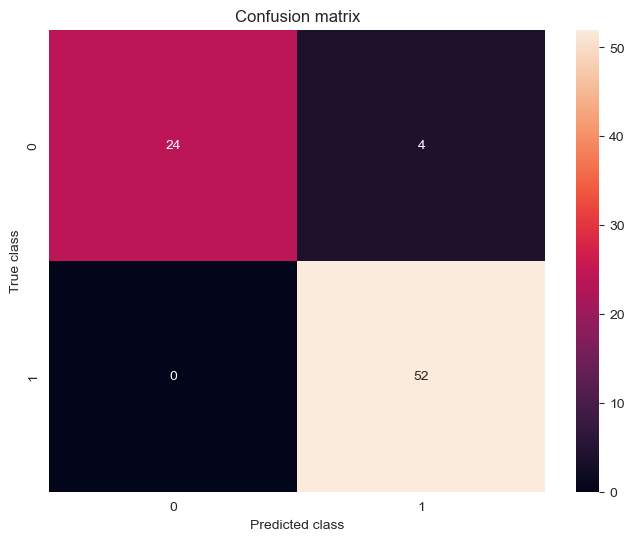

In [57]:
# Calcula la matriz de confusión


In [58]:
# Imprimime el informe de clasificación


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.93      1.00      0.96        52

    accuracy                           0.95        80
   macro avg       0.96      0.93      0.94        80
weighted avg       0.95      0.95      0.95        80



**¿Cómo interpretas estas métricas? ¿Qué métrica crees que es la más importante en nuestro problema?**

_Incluye aquí tus observaciones._

## 6. Predecir riesgo en nuevos pacientes

Ahora vamos a ver cómo usaríamos nuestro modelo con datos de nuevos pacientes que llegasen al servicio del nefrología del hospital y quisiésemos predecir si están en riesgo de padecer IRC.

**Preprocesa las características de entrada de los pacientes que quieres clasificar. Te doy dos de muestra pero puedes añadir todos los que quieras.**

In [59]:
new_data = {'id': [1023, 3429],
            'age': [19, 87],
            'bp': [45, 165],
            'sg': [1.025, 1.015],
            'al': [0, 1],
            'su': [1, 0],
            'bgr': [50, 450],
            'bu': [1.5, 275],
            'sc': [27, 45],
            'sod': [20, 173],
            'pot': [17, 45],
            'hemo': [12, 5],
            'pcv': [40, 11],
            'wbcc': [8100, 4200],
            'rbcc': [7, 4],
            'rbc_normal': [1, 0],
            'pc_normal': [0, 0],
            'pcc_present': [0, 1],
            'ba_present': [1, 1],
            'htn_yes': [0, 1],
            'dm_yes': [0, 1],
            'cad_yes': [1, 0],
            'appet_poor': [1, 1],
            'pe_yes': [0, 0],
            'ane_yes': [1, 0]}

In [60]:
# Crea un DataFrame con los nuevos datos

# Establece 'id' como índice


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
id,,,,,,,,,,,,,,,,,,,,,
1023,19,45,1.025,0,1,50,1.5,27,20,17,...,1,0,0,1,0,0,1,1,0,1
3429,87,165,1.015,1,0,450,275.0,45,173,45,...,0,0,1,1,1,1,0,1,0,0


In [61]:
# Escala los datos


In [62]:
# Recrea el dataset de prueba con las columnas estandarizadas


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
id,,,,,,,,,,,,,,,,,,,,,
1023,0.193182,-0.038462,1.0,0.00,0.2,-0.050891,-0.022310,0.350993,0.097792,0.325843,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3429,0.965909,0.884615,0.5,0.25,0.0,0.966921,0.695538,0.589404,1.063091,0.955056,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


**Realiza las predicciones usando el modelo que hemos entrenado.**

In [63]:
leyenda = {0: 'NO',
           1: 'SÍ'}

In [64]:
# Haz las predicciones

# Imprime el resultado de las predicciones


El paciente con 1023 NO está en riesgo de padecer IRC.
El paciente con 3429 SÍ está en riesgo de padecer IRC.
